In [22]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import requests
import pandas as pd
import time
from bs4 import BeautifulSoup as bs
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


'<html><head><meta charset="utf-8"><meta http-equiv="x-ua-compatible" content="ie=edge"><title>네이버 항공권</title><meta name="description" content="설레는 여행의 시작. 네이버 항공권과 함께!"><meta property="og:title" content="네이버 항공권"><meta property="og:description" content="설레는 여행의 시작. 네이버 항공권과 함께!"><meta property="og:type" content="article"><meta property="og:article:author" content="네이버 항공권"><meta property="og:site_name" content="네이버 항공권"><meta property="og:image" content="https://m-flight.naver.com/images/og_image.png"><meta property="og:url" content="https://m-flight.naver.com"><meta property="twitter:card" content="summary_large_image"><meta property="twitter:title" content="네이버 항공권"><meta property="twitter:description" content="설레는 여행의 시작. 네이버 항공권과 함께!"><meta property="twitter:site" content="네이버 항공권"><meta property="twitter:image" content="https://m-flight.naver.com/images/og_image.png"><meta property="og:article:author" content="네이버 항공권"><meta name="viewport" content="width=device-width,initial-sca
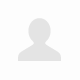
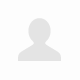

In [23]:
url='https://flight.naver.com/'
driver=webdriver.Chrome('./chromedriver.exe')

driver.get(url)
driver.maximize_window()

#편도 클릭
driver.find_element(By.XPATH,'//*[@id="__next"]/div/div[1]/div[4]/div/div/div[1]/button[2]/i').click()
time.sleep(1)

#출발지 클릭
driver.find_element(By.XPATH,'//*[@id="__next"]/div/div[1]/div[4]/div/div/div[2]/div[1]/button[1]/b').click()
time.sleep(1)

#출발지 입력창
driver.find_element(By.XPATH,'//*[@id="__next"]/div/div[1]/div[9]/div[1]/div/input').send_keys('서울')
time.sleep(1)

#서울 선택
driver.find_element(By.XPATH,'//*[@id="__next"]/div/div[1]/div[9]/div[2]/section/div/a[1]').click()
time.sleep(1)

#도착지 클릭
driver.find_element(By.XPATH,'//*[@id="__next"]/div/div[1]/div[4]/div/div/div[2]/div[1]/button[2]/b').click()
time.sleep(1)

#도착지 입력창
driver.find_element(By.XPATH,'//*[@id="__next"]/div/div[1]/div[9]/div[1]/div/input').send_keys('제주')
time.sleep(1)

#제주도 선택
driver.find_element(By.XPATH,'//*[@id="__next"]/div/div[1]/div[9]/div[2]/section/div/a').click()
time.sleep(1)

#가는날 클릭(내일로 설정,현재일: 8-11이니까 내일은 :8-12일 항공권 모두 검색하려고 함)
driver.find_element(By.XPATH,'//*[@id="__next"]/div/div[1]/div[4]/div/div/div[2]/div[2]/button').click()
time.sleep(1)

#월선택
months=driver.find_elements(By.CLASS_NAME,'month')

#일선택(현재 월(month[0]의 12일로 저장함))
days=months[0].find_elements(By.CLASS_NAME,'num')
days[11].click()

#항공권 검색
driver.find_element(By.XPATH,'//*[@id="__next"]/div/div[1]/div[4]/div/div/button').click()
time.sleep(10)

for i in range(10):
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    time.sleep(2)
    
html=driver.page_source
html

In [47]:
soup=bs(html,'html.parser')
total=soup.find_all('div','domestic_Flight__sK0eA result')

res=[]
for i in total:
    charge=i.find('b','domestic_price__1qAgw').text
    plane=i.find('b','name').text
    aboard=i.select('div.route_Route__2UInh>span')[0].text
    dest=i.select('div.route_Route__2UInh>span')[1].text
    time=i.find('i','route_info__1RhUH').text
    event=i.find('div','domestic_item_promotion__2q5bH').find('i','domestic_type__30RSq').text
    
    res.append([plane,aboard,dest,time,charge,event])

df=pd.DataFrame(res,columns=['항공사','출발시간','도착시간','소요시간','가격','할인행사'])
df

,항공사,출발시간,도착시간,소요시간,가격,할인행사
0,제주항공,12:40GMP,13:50CJU,01시간 10분,"편도 133,500원~",삼성카드 결제시 3.2% 캐시백
1,티웨이항공,12:50GMP,14:00CJU,01시간 10분,"편도 132,200원~",삼성카드 결제시 3.6% 캐시백
2,대한항공,13:00GMP,14:10CJU,01시간 10분,"편도 144,000원~",삼성카드 결제시 3.3% 캐시백
3,티웨이항공,13:05GMP,14:15CJU,01시간 10분,"편도 132,200원~",삼성카드 결제시 3.6% 캐시백
4,제주항공,13:15GMP,14:25CJU,01시간 10분,"편도 133,500원~",삼성카드 결제시 3.2% 캐시백
5,아시아나항공,13:25GMP,14:30CJU,01시간 05분,"편도 111,000원~",롯데카드 결제시 3.1% 캐시백
6,진에어,13:25GMP,14:40CJU,01시간 15분,"편도 130,900원~",삼성카드 결제시 4.1% 캐시백
7,진에어,13:25GMP,14:40CJU,01시간 15분,"편도 134,000원~",삼성카드 결제시 4.1% 캐시백
8,아시아나항공,13:25GMP,14:30CJU,01시간 05분,"편도 147,000원~",롯데카드 결제시 3.1% 캐시백
9,제주항공,13:30GMP,14:40CJU,01시간 10분,"편도 133,500원~",삼성카드 결제시 3.2% 캐시백


# 질문1.제주도 항공권 평균가격

In [48]:
res_p=[]
for j in df['가격']:
    p=int(j.replace('편도 ','').replace(',','').replace('원~',''))
    res_p.append(p)
df['가격']=res_p
fee=round(df['가격'].mean())
print(f'제주도 평균가격: {fee}')

제주도 평균가격: 130150


# 질문2.시간별 제주도 항공권 평균가격 

In [49]:
round(df.groupby(['항공사','출발시간']).mean())

가격
항공사    출발시간              
대한항공   13:00GMP  144000.0
       13:35GMP  144000.0
       14:10GMP  144000.0
       14:20GMP  121000.0
       14:50GMP  121000.0
       15:00GMP  121000.0
       15:10GMP  121000.0
아시아나항공 13:25GMP  129000.0
       13:55GMP  129000.0
       14:05GMP  132000.0
       14:25GMP  132000.0
       14:55GMP  135000.0
       15:05GMP  129000.0
에어부산   15:05GMP  133000.0
에어서울   15:00GMP  126450.0
제주항공   12:40GMP  133500.0
       13:15GMP  133500.0
       13:30GMP  133500.0
       14:40GMP  133500.0
       15:10GMP  129200.0
진에어    13:25GMP  132450.0
       14:05GMP  126450.0
       14:40GMP  127450.0
티웨이항공  12:50GMP  132200.0
       13:05GMP  132200.0
       13:55GMP  124150.0
       14:35GMP  127150.0

# 질문3.항공사별 항공권 평균가격

In [50]:
round(df.groupby('항공사').mean())

,가격
항공사,
대한항공,130857.0
아시아나항공,131000.0
에어부산,133000.0
에어서울,126450.0
제주항공,132067.0
진에어,128783.0
티웨이항공,127833.0


# 질문4.항공사별 운행회수

In [57]:
df.groupby(['항공사']).count()[['출발시간']]

,출발시간
항공사,
대한항공,7
아시아나항공,12
에어부산,1
에어서울,2
제주항공,6
진에어,6
티웨이항공,6


# 질문5. 시간대별로 항공사별 운행횟수

In [56]:
df.groupby(['항공사','출발시간']).count()[['도착시간']]

도착시간
항공사    출발시간          
대한항공   13:00GMP     1
       13:35GMP     1
       14:10GMP     1
       14:20GMP     1
       14:50GMP     1
       15:00GMP     1
       15:10GMP     1
아시아나항공 13:25GMP     2
       13:55GMP     2
       14:05GMP     2
       14:25GMP     2
       14:55GMP     2
       15:05GMP     2
에어부산   15:05GMP     1
에어서울   15:00GMP     2
제주항공   12:40GMP     1
       13:15GMP     1
       13:30GMP     1
       14:40GMP     1
       15:10GMP     2
진에어    13:25GMP     2
       14:05GMP     2
       14:40GMP     2
티웨이항공  12:50GMP     1
       13:05GMP     1
       13:55GMP     2
       14:35GMP     2

# 질문6. 카드사별 제휴 항공사 조사

<AxesSubplot:ylabel='카드사,항공사'>

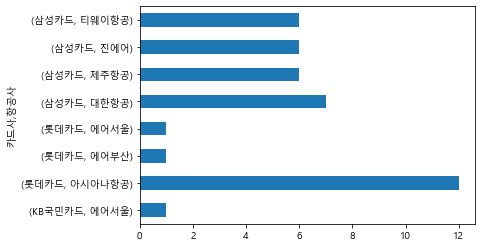

In [61]:
res_e=[]
for e in df['할인행사']:
    eve=e.split(' ')[0]
    res_e.append(eve)
df['카드사']=res_e
df.groupby(['카드사','항공사']).count()['출발시간'].plot(kind='barh')

In [60]:
df

,항공사,출발시간,도착시간,소요시간,가격,할인행사,카드사
0,제주항공,12:40GMP,13:50CJU,01시간 10분,133500,삼성카드 결제시 3.2% 캐시백,삼성카드
1,티웨이항공,12:50GMP,14:00CJU,01시간 10분,132200,삼성카드 결제시 3.6% 캐시백,삼성카드
2,대한항공,13:00GMP,14:10CJU,01시간 10분,144000,삼성카드 결제시 3.3% 캐시백,삼성카드
3,티웨이항공,13:05GMP,14:15CJU,01시간 10분,132200,삼성카드 결제시 3.6% 캐시백,삼성카드
4,제주항공,13:15GMP,14:25CJU,01시간 10분,133500,삼성카드 결제시 3.2% 캐시백,삼성카드
5,아시아나항공,13:25GMP,14:30CJU,01시간 05분,111000,롯데카드 결제시 3.1% 캐시백,롯데카드
6,진에어,13:25GMP,14:40CJU,01시간 15분,130900,삼성카드 결제시 4.1% 캐시백,삼성카드
7,진에어,13:25GMP,14:40CJU,01시간 15분,134000,삼성카드 결제시 4.1% 캐시백,삼성카드
8,아시아나항공,13:25GMP,14:30CJU,01시간 05분,147000,롯데카드 결제시 3.1% 캐시백,롯데카드
9,제주항공,13:30GMP,14:40CJU,01시간 10분,133500,삼성카드 결제시 3.2% 캐시백,삼성카드
